# Neural Network

Below is my understanding and realisation of Deep NN. Knowledge and dataset taken from [deeplearning.ai course](https://www.deeplearning.ai/courses/deep-learning-specialization/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Model Scheme

<img src='image/nn-scheme.jpg'>

### 1. Forward Propagation

Forward Propagation has $L$ layers.

Activation functions:

- **Sigmoid**: $\displaystyle\sigma(z) = \frac{1}{1 + e^{-Z}}$ - used for last layer (prediction).

- **ReLU**: $\displaystyle relu(z) = max(0,z)$ - used for hidden layers.

Reccurent relation for computing forward propagation (superscript ~ layer's number):

$$Z^{[i]} = W^{[i]}A^{[i-1]} + b^{[i]}$$

$$A^{[i]} = a^{[i]}(Z^{[i]}), \ \ A^{[0]} = X$$

where $a^{[l]}$ is activation function of layer $l$, either ReLU or sigmoid.

### 2. Cost (MLE)

Given input vector $x$, we want to estimate probability of observing output value $y$, which is $p(y|x) = \widehat{y}$. It means that $p(y = 0|x) = \widehat{y}$ and $p(y = 1|x) = 1 - \widehat{y}$ (or vice versa). It could be shown that probability distribution $p(y|x) = \widehat{y}^y \times (1 - \widehat{y}) ^{1-y}$ is indeed a probability distribution and produces needed values for $y = 0$ and $y = 1$. Thus, maximizing $p(y|x)$ is the same as minimizing $-\log p(y|x)$, which is easier to compute. $-\log p(y|x) = - (\widehat{y}\log y + (1-\widehat{y})\log(1 - y))$.

That is, given input vector $X$ of **independently and identically distributed** random variables (which are vectors, and thus $X$ is matrix), we want to estimate probability of observing output vector $Y$, which is $p(Y|X)$.

$$p(Y|X) = \prod_{i=1}^{n} p(y_i|x_i)$$
$$-\log p(Y|X) = \sum_{i=1}^{n} \log p(y_i|x_i)$$

$$J(\widehat{Y}, Y) = - \frac{1}{n} \sum_{i=1}^{n} \widehat{y}_i\log y_i + (1-\widehat{y}_i)\log(1 - y_i)$$

### 3. Backward Propagation

<img src='image/forw-back-nn.jpg'>

Consider layer $l < L$.

It is propagated forward as: $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}; A^{[l]} = a^{[l]}(Z^{[l]})$. Assume you have already calculated $dZ^{[l]}$ (abbreviation for $\displaystyle\frac{\partial J}{\partial Z^{[l]}}$ since all derivatives are computed as $J$ with respect to something) and need to get $dW^{[l]}, db^{[l]}, dA^{[l-1]}$.

$$dW^{[l]} = \frac{\partial J}{\partial W^{[l]}} = \frac{\partial J}{\partial Z^{[l]}} (\text{which is calculated on previous step}) \times \frac{\partial Z^{[l]}}{\partial W^{[l]}} = \frac{1}{n}dZ^{[l]} A^{[l-1]T} (\text{as }W^{[l]} \text{ of shape } (n^{[l]}, n^{[l-1]}))$$

$$db^{[l]} = \frac{\partial J}{\partial b^{[l]}} = \frac{\partial J}{\partial Z^{[l]}} = \frac{1}{n}\sum_{i=1}^{n} dZ^{[l](i)} (\text{vector of shape }(n^{[l]}, 1))$$

$$dA^{[l-1]} = \frac{\partial J}{\partial A^{[l-1]}} = \frac{\partial J}{\partial Z^{[l]}} \times \frac{\partial Z^{[l]}}{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

Computing $dZ^{[l]}$ gives opportunity to **update weights** in current layer $l$ and continue with layer $l-1$.

$$dZ^{[l]} = \frac{\partial J}{\partial Z^{[l]}} = \frac{\partial J}{\partial A^{[l]}} \times \frac{\partial A^{[l]}}{\partial Z^{[l]}} = dA^{[l]} \times a^{[l]'}(Z)$$

where $a^{[l]'}(Z)$ is derivative of activation function $a(Z)$ of layer $l$ with respect to $Z$. We need one for both ReLU and sigmoid:

- **ReLU**: $relu'(z) = [z > 0]$.
- **Sigmoid**: $\sigma'(z) = \sigma(z) (1 - \sigma(z))$

However, **to initialize the chain** we need to compute $dA^{[l]}$ first. For $l = L$ (check with two lines of calculus):

$$\frac{\partial  J(a^{[l](i)}, y^{(i)})}{\partial a^{[l](i)}} = - \frac{y^{(i)}}{a^{[l](i)}} + \frac{1 - y^{(i)}}{1 - a^{[l](i)}}$$

### 4. Regularization

#### 4.1. $L_1$/$L_2$ regularization

$L_1$/$L_2$ regularization techniques have an idea of penalizing algorithm for assigning large weights to some features.

Cost function provided above is **cross entropy loss**:

$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \left(\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \right)$$

Regularized cost function:

$$J_{L_1} = \text{cross entropy} + \frac{\lambda}{2n}\sum_{\text{layers}}\sum_{\text{rows}}\sum_{\text{columns}} |W^{[l]}_{r,c}|$$

$$J_{L_2} = \text{cross entropy} + \frac{\lambda}{2n}\sum_{\text{layers}}\sum_{\text{rows}}\sum_{\text{columns}} W^{[l]^2}_{r,c}$$

Addition of either of $L_1$ or $L_2$ regularization affects not only cost function, but $\displaystyle\frac{\partial J}{\partial W^{[l]}}$ as well, since regularization term contains $\displaystyle W^{[l]}$:

$$dW^{[l]} = \frac{\partial J_{L_1}}{\partial W^{[l]}} = \frac{\partial J_{L_1}}{\partial Z^{[l]}} \times \frac{\partial Z^{[l]}}{\partial W^{[l]}} + L_1\text{ loss} = dZ^{[l]}A^{[l-1]T} + \frac{\lambda}{2n}\sum_{\text{layers}}\sum_{\text{rows}}\sum_{\text{columns}} (-1)^{\left[W^{[l]}_{r,c} \ < \ 0\right]}$$

$$dW^{[l]} = \frac{\partial J_{L_2}}{\partial W^{[l]}} = \frac{\partial J_{L_2}}{\partial Z^{[l]}} \times \frac{\partial Z^{[l]}}{\partial W^{[l]}} + L_2\text{ loss} = dZ^{[l]}A^{[l-1]T} + \frac{\lambda}{n}\sum_{\text{layers}}\sum_{\text{rows}}\sum_{\text{columns}} W_{r,c}^{[l]}$$

##### How does L1/L2 regularization reduces overfitting?

<img src='image/regularization1.jpg'>

<img src='image/regularization2.jpg'>

**Comment**: if activation function in all layers is linear, then the network is just logistic regression (write down resulting prediction function using some algebra). That is, if *some* activation functions resemble a linear classifier, then overall model complexity diminishes, since some parts become "just linear".

#### 4.2. Inverted dropout regularization

**Idea**: with probability $p_{i,j}$ $i$-th node of $j$-th layer will be deleted from network during current iteration.

**Motivation**: random removal of neurons leads to learning from other data *more*. On each iteration we "abuse" some neurons, and this effect is averaged across iterations (similar to random forest techinque).

**Caveats**: since some neurons of layer $l$ are off, then actual value of $A^{[l]}$ is lower than its expected value. Thus, we can adjust it multiplying by inverse of $p_{i,j}$.

##### Why does dropout work?

Algorithm can't rely on any one feature, so have to spread out weights (and therefore **shrink norm of the vector**).

## Activation functions

In [2]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(dA, Z):
    s = sigmoid(Z)
    return dA * s * (1 - s)

In [3]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(dA, Z):
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    return dZ

## Neural Network Class

In [4]:
class nn_model:
    def __init__(self, layer_sizes=[5, 5, 5], learning_rate=0.01, n_epochs=2500, keep_prob=None, lambd=0, regularization=None, print_cost=True):
        self.learning_rate_ = learning_rate
        self.L_ = len(layer_sizes) - 1 # number of layers (except input layer)
        self.layer_sizes_ = deepcopy(layer_sizes)
        self.n_epochs_ = n_epochs
        self.print_cost = print_cost
        
        self.W_ = list()
        self.b_ = list()
        
        self.activation_f_ = {'sigmoid': sigmoid, 'relu': relu}
        self.activation_f_derivative_ = {'sigmoid': sigmoid_derivative, 'relu': relu_derivative}
        
        if regularization is not None:
            assert regularization in ['l1', 'l2', 'dropout'], f"'regularization' must be one of ('l1', 'l2', 'dropout')"
            self.regularization_ = regularization
            
        else:
            self.regularization_ = None
            
        self.lambda_ = lambd
        self.keep_prob_ = keep_prob

        
    # Initialization
    def _initialize(self, w_coef=0.01):
        np.random.seed(1)
        
        for i in range(self.L_):
            
            shape_W = (self.layer_sizes_[i + 1], self.layer_sizes_[i])
            # 2/sqrt - 'He' initialization, good for ReLU. 1/sqrt - 'Xavier' initialization
            self.W_.append(np.random.randn(*shape_W) * np.sqrt(1/self.layer_sizes_[i]))
            
            shape_b = (self.layer_sizes_[i + 1], 1)
            self.b_.append(np.zeros(shape_b))
        
    # Forward propagation
    def _forward_step(self, A_prev, W, b, activation):
        Z = np.dot(W, A_prev) + b
        A = self.activation_f_[activation](Z)
        
        cache = {'Z': Z, 'A_prev': A_prev, 'W': W, 'b': b}
        
        return A, cache
    
    def _forward_prop(self, X, is_predict=False):
        self.cache_ = list()
        A = X
        
        for i in range(self.L_-1):
            A_prev = A
            
            A, cache = self._forward_step(A_prev, self.W_[i], self.b_[i], 'relu')
            
            # random shut down in hidden layers
            if not is_predict and self.regularization_ == 'dropout':
                rand_vector = np.random.rand(*A.shape)
                zero_one_vector = (rand_vector < self.keep_prob_).astype(int)
                A *= zero_one_vector
                # back to expected value
                A /= self.keep_prob_
                
                cache['zero_one_vector'] = zero_one_vector
                
            self.cache_.append(cache)
            
        A_last, cache = self._forward_step(A, self.W_[-1], self.b_[-1], 'sigmoid')
        self.cache_.append(cache)
        
        return A_last
    
    # Backward propagation
    def _backward_step(self, dA, cache, activation):
        derivative = self.activation_f_derivative_[activation]
        Z = cache['Z']
        
        dZ = derivative(dA, Z)
        
        A_prev, W, b = cache['A_prev'], cache['W'], cache['b']
        
        dW = np.dot(dZ, A_prev.T) / self.n_instances_
        db = np.sum(dZ, axis=1, keepdims=True) / self.n_instances_
        dA_prev = np.dot(W.T, dZ)
        
        # weights term in L1/L2 regularization
        if self.regularization_ in ['l1', 'l2']:
            if self.regularization_ == 'l1':
                f = lambda _W: self.lambda_ / (2 * self.n_instances_) * ((_W > 0).astype(int) - (_W < 0).astype(int))
            elif self.regularization_ == 'l2':
                f = lambda _W:self.lambda_ / self.n_instances_ *  _W 
            dW += f(W)
        
        return dA_prev, dW, db
        
    def _backward_prop(self, A_last):
        self.Y = self.Y.reshape(A_last.shape)
        
        self.grads_ = list()            
        dA_last = - (np.divide(self.Y, A_last) - np.divide(1 - self.Y, 1 - A_last))
        
        cache = self.cache_[-1]
        dA_prev, dW, db = self._backward_step(dA_last, cache, 'sigmoid')
        grads = {"dW": dW, "db": db}
        
        self.grads_.append(grads)
        
        for i in reversed(range(self.L_-1)):
            cache = self.cache_[i]
            
            # adjust back_prop with dropout
            if self.regularization_ == 'dropout':
                dA_prev *= cache['zero_one_vector']
                dA_prev /= self.keep_prob_
            
            dA_prev, dW, db = self._backward_step(dA_prev, cache, 'relu')
            grads = {"dW": dW, "db": db}
            
            self.grads_.append(grads)
            
        self.grads_ = list(reversed(self.grads_))
        
        return
    
    # update weights
    def _update_weights(self):
        W_ = self.W_.copy()
        b_ = self.b_.copy()
    
        for i in range(self.L_):
            self.W_[i] = W_[i] - self.learning_rate_ * self.grads_[i]['dW']
            self.b_[i] = b_[i] - self.learning_rate_ * self.grads_[i]['db']
            
        return
        
    
    def _get_cost(self, A_last, Y):
        cost = - (np.dot(np.log(A_last), Y.T) + np.dot(np.log(1 - A_last), (1 - Y).T)) / self.n_instances_
        
        # L1/L2 regularization changes cost-function
        if self.regularization_ in ['l1', 'l2']:
            if self.regularization_ == 'l1':
                f = lambda _W: np.sum(np.absolute(_W))
            elif self.regularization_ == 'l2':
                f = lambda _W: np.sum(np.square(_W))
            
            w_loss = 0
            for c in self.cache_:
                w_loss += f(c['W'])
                
            reg_loss = self.lambda_ * (2/self.n_instances_) * w_loss
                
            cost += reg_loss
        
        return np.squeeze(cost)
            
    def fit(self, X, y):
        self.X = X
        self.Y = y
        self.n_instances_ = X.shape[1]
        self._initialize()
        
        self.costs = list()
        
        for i in range(self.n_epochs_):
            A_last = self._forward_prop(X, is_predict=False)
        
            self._backward_prop(A_last)
            self._update_weights()
            
            cost = self._get_cost(A_last, y)
            
            if self.print_cost and i % 100 == 0 or i == self.n_epochs_ - 1:
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            if i % 100 == 0 or i == self.n_epochs_:
                self.costs.append(cost)
                
        return self
                
    def predict(self, X_test):
        n_instances = X_test.shape[1]
        p = np.zeros(shape=(1, n_instances))
        
        probas = self._forward_prop(X_test, is_predict=True)
        
        # convert probas to 0/1 predictions
        for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
                                
        return p
            
        

## Test model

### Cats dataset

In [5]:
import h5py

def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


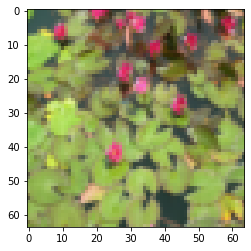

In [7]:
# Example of a picture
index = 18
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [9]:
# Helper function
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

### 2-layer NN

Cost after iteration 0: 0.6950464961800917
Cost after iteration 100: 0.5892596054583805
Cost after iteration 200: 0.5232609173622991
Cost after iteration 300: 0.44976863962219055
Cost after iteration 400: 0.42090021618838985
Cost after iteration 500: 0.3724640306174595
Cost after iteration 600: 0.3474205187020191
Cost after iteration 700: 0.3171919198737029
Cost after iteration 800: 0.266437743477466
Cost after iteration 900: 0.21991432807842562
Cost after iteration 1000: 0.14357898893623758
Cost after iteration 1100: 0.45309212623221307
Cost after iteration 1200: 0.0949935767009351
Cost after iteration 1300: 0.08014128076781367
Cost after iteration 1400: 0.06940234005536464
Cost after iteration 1500: 0.06021664023174592
Cost after iteration 1600: 0.05327415758001876
Cost after iteration 1700: 0.047629032620984335
Cost after iteration 1800: 0.042975888794368686
Cost after iteration 1900: 0.03903607436513822
Cost after iteration 2000: 0.03568313638049026
Cost after iteration 2100: 0.032

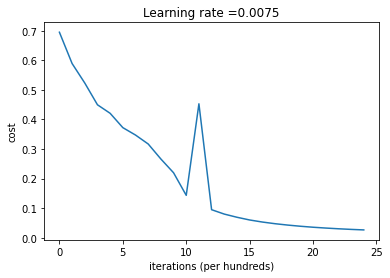

In [10]:
model = nn_model(layer_sizes=[12288, 7, 1], learning_rate=0.0075, n_epochs=2500)
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [11]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

1.0


In [12]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.74


### 4-layer NN

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101356
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.3917469743480535
Cost after iteration 1000: 0.31518698886006163
Cost after iteration 1100: 0.27269984417893856
Cost after iteration 1200: 0.23741853400268131
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.189263003884633
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363318
Cost after iteration 1700: 0.1377748781297294
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.10783928526254

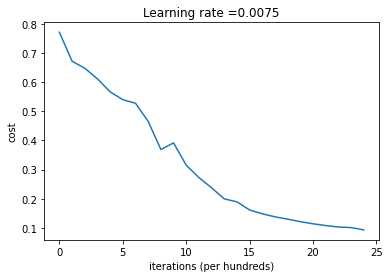

In [13]:
model = nn_model(layer_sizes=[12288, 20, 7, 5, 1], learning_rate=0.0075, n_epochs=2500)
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [14]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

0.9856459330143541


In [15]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.8


### 5-layer NN

Cost after iteration 0: 0.7043530082286679
Cost after iteration 100: 0.672516441900389
Cost after iteration 200: 0.6533879319496736
Cost after iteration 300: 0.633758270903465
Cost after iteration 400: 0.6104036892592286
Cost after iteration 500: 0.5636396717485451
Cost after iteration 600: 0.48298310630798885
Cost after iteration 700: 0.3796419943131105
Cost after iteration 800: 0.30439894957732677
Cost after iteration 900: 0.2361449339918164
Cost after iteration 1000: 0.17311674506243319
Cost after iteration 1100: 0.09035623197181736
Cost after iteration 1200: 0.049838488021863595
Cost after iteration 1300: 0.03351841641211865
Cost after iteration 1400: 0.024383419949039493
Cost after iteration 1500: 0.018615397038311787
Cost after iteration 1600: 0.014640862735613798
Cost after iteration 1700: 0.011857751708296007
Cost after iteration 1800: 0.00982492461261707
Cost after iteration 1900: 0.008287916992604285
Cost after iteration 2000: 0.0071014605738155216
Cost after iteration 2100: 

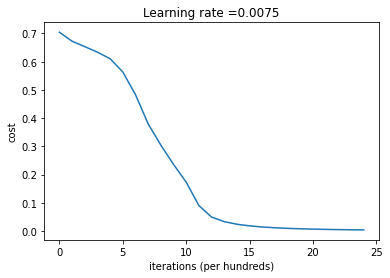

In [16]:
model = nn_model(layer_sizes=[12288, 20, 12, 8, 5, 1], learning_rate=0.0075, n_epochs=2500)
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [17]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

1.0


In [18]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.72


Optimum value of layers is $4$, because $1$-layer NN needs more complexity and therefore overfits training data, wherease $5$-layer NN is too comlex, overfitting traning set as well. Thus, we need some regularization term.

### Adding regularization (4-layer NN)

#### L2, lambda = 0.1

Cost after iteration 0: 0.806931019911478
Cost after iteration 100: 0.7080584800755793
Cost after iteration 200: 0.6835936213182183
Cost after iteration 300: 0.6442647452328795
Cost after iteration 400: 0.6268755972458203
Cost after iteration 500: 0.5703271608282582
Cost after iteration 600: 0.5228188601732591
Cost after iteration 700: 0.5340314528773996
Cost after iteration 800: 0.42023176200445994
Cost after iteration 900: 0.38499096740870103
Cost after iteration 1000: 0.330698136818209
Cost after iteration 1100: 0.29388832824653804
Cost after iteration 1200: 0.2646349283136061
Cost after iteration 1300: 0.2400655608585576
Cost after iteration 1400: 0.21888082542736295
Cost after iteration 1500: 0.2012431787004738
Cost after iteration 1600: 0.19014494629010487
Cost after iteration 1700: 0.17962483953352848
Cost after iteration 1800: 0.17063193384811257
Cost after iteration 1900: 0.16291434484566703
Cost after iteration 2000: 0.15765384166160334
Cost after iteration 2100: 0.1538048999

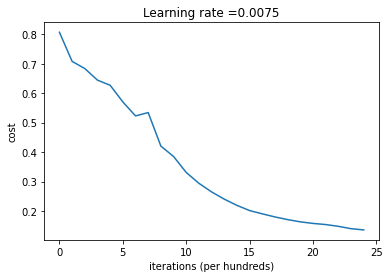

In [19]:
model = nn_model(layer_sizes=[12288, 20, 7, 5, 1], learning_rate=0.0075, n_epochs=2500, lambd=0.1, regularization='l2')
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [20]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

0.9856459330143541


In [21]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.82


#### L1, lambda = 0.01

Cost after iteration 0: 2.502592318148079
Cost after iteration 100: 2.35990770526255
Cost after iteration 200: 2.29257454850172
Cost after iteration 300: 2.2263460262342156
Cost after iteration 400: 2.179495313842696
Cost after iteration 500: 2.0764735017041636
Cost after iteration 600: 1.9882962966274889
Cost after iteration 700: 1.973954447439478
Cost after iteration 800: 1.8246731333202402
Cost after iteration 900: 1.7817766837554607
Cost after iteration 1000: 1.7093873308421579
Cost after iteration 1100: 1.6564633634473473
Cost after iteration 1200: 1.6004953414406418
Cost after iteration 1300: 1.539833292450659
Cost after iteration 1400: 1.4997224582107505
Cost after iteration 1500: 1.4369319997857348
Cost after iteration 1600: 1.4987510816091327
Cost after iteration 1700: 1.351657555228253
Cost after iteration 1800: 1.311526117395804
Cost after iteration 1900: 1.2731188585161404
Cost after iteration 2000: 1.2419300853822663
Cost after iteration 2100: 1.2003733686345628
Cost after

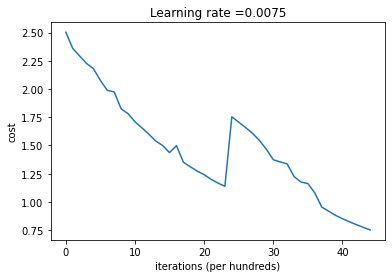

In [22]:
model = nn_model(layer_sizes=[12288, 20, 7, 5, 1], learning_rate=0.0075, n_epochs=4500, lambd=0.1, regularization='l1')
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [23]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

1.0


In [24]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.76


#### Dropout

Cost after iteration 0: 0.7796359141247559
Cost after iteration 100: 0.6761015425900349
Cost after iteration 200: 0.655625720310114
Cost after iteration 300: 0.6257827328502236
Cost after iteration 400: 0.6010395403418035
Cost after iteration 500: 0.5495514707185977
Cost after iteration 600: 0.49339151915340695
Cost after iteration 700: 0.4462236925471753
Cost after iteration 800: 0.4311637615148637
Cost after iteration 900: 0.4013461064943153
Cost after iteration 1000: 0.3252392771997505
Cost after iteration 1100: 0.31083037068177294
Cost after iteration 1200: 0.30582425084304204
Cost after iteration 1300: 0.2708018760851602
Cost after iteration 1400: 0.2431350133632325
Cost after iteration 1500: 0.2245590002543081
Cost after iteration 1600: 0.2060190013785344
Cost after iteration 1700: 0.16939953480562767
Cost after iteration 1800: 0.19759871033318513
Cost after iteration 1900: 0.18606783915816869
Cost after iteration 2000: 0.15093775626355335
Cost after iteration 2100: 0.16052609050

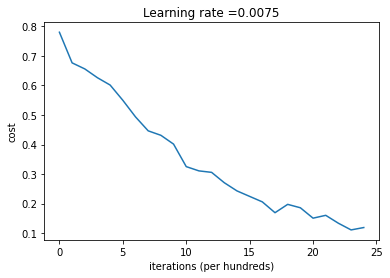

In [25]:
model = nn_model(layer_sizes=[12288, 20, 7, 5, 1], learning_rate=0.0075, n_epochs=2500, keep_prob=0.9, 
                 regularization='dropout')
model.fit(train_x, train_y)
plot_costs(model.costs, model.learning_rate_)

In [26]:
preds = model.predict(train_x)
print(np.sum(preds == train_y) / train_x.shape[1])

1.0


In [27]:
preds = model.predict(test_x)
print(np.sum(preds == test_y) / test_x.shape[1])

0.78
